In [1357]:
''' DATA '''
# 1. Importing the dataset
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

mexico_crime = pd.read_csv("mexico_crime.csv") # From https://www.kaggle.com/datasets/elanderos/official-crime-stats-mexico-2015-2023

# Save a copy of the original dataset
og_mexico_crime = mexico_crime.copy()

mexico_crime

,year,entity_code,entity,affected_legal_good,type_of_crime,subtype_of_crime,modality,month,count
0,2015,1,Aguascalientes,Life and bodily integrity,Homicide,Intentional Homicide,With firearm,January,3
1,2015,1,Aguascalientes,Life and bodily integrity,Homicide,Intentional Homicide,With sharp weapon,January,1
2,2015,1,Aguascalientes,Life and bodily integrity,Homicide,Intentional Homicide,With another element,January,0
3,2015,1,Aguascalientes,Life and bodily integrity,Homicide,Intentional Homicide,Not specified,January,2
4,2015,1,Aguascalientes,Life and bodily integrity,Homicide,Manslaughter,With firearm,January,0
...,...,...,...,...,...,...,...,...,...
332411,2022,32,Zacatecas,Other legal interests affected (from common law),Counterfeiting,Forgery,Forgery,December,8
332412,2022,32,Zacatecas,Other legal interests affected (from common law),Environmental crimes,Environmental crimes,Against the environment,December,1
332413,2022,32,Zacatecas,Other legal interests affected (from common law),Crimes committed by public officials,Crimes committed by public servants,Crimes committed by public servants,December,20
332414,2022,32,Zacatecas,Other legal interests affected (from common law),Electoral crimes,Electoral crimes,Electoral crimes,December,0


In [1358]:
# 2. Checking the dataset for null or NaN values
print(mexico_crime.isnull().sum())
print(mexico_crime.isna().sum())

year                   0
entity_code            0
entity                 0
affected_legal_good    0
type_of_crime          0
subtype_of_crime       0
modality               0
month                  0
count                  0
dtype: int64
year                   0
entity_code            0
entity                 0
affected_legal_good    0
type_of_crime          0
subtype_of_crime       0
modality               0
month                  0
count                  0
dtype: int64


In [1359]:
# 3. Dropping irrelevant columns for this analysis
mexico_crime = mexico_crime.drop(['entity_code'], axis=1)
mexico_crime = mexico_crime.drop(['affected_legal_good'], axis=1)
mexico_crime = mexico_crime.drop(['subtype_of_crime'], axis=1)
mexico_crime = mexico_crime.drop(['modality'], axis=1)

In [1360]:
# 4. Exploring the dataset by type_of_crime
mexico_crime['type_of_crime'].unique()

array(['Homicide', 'Injuries', 'Feminicide', 'Abortion',
       'Other crimes against life and bodily integrity', 'Kidnapping',
       'Child trafficking', 'Abduction',
       'Other crimes against personal freedom', 'Sexual abuse',
       'Sexual harassment', 'Simple rape', 'Aggravated rape', 'Incest',
       'Other crimes against sexual freedom and security', 'Robbery',
       'Fraud', 'Embezzlement', 'Extortion', 'Property damage',
       'Dispossession', 'Other crimes against heritage or property',
       'Domestic violence',
       'Gender-based violence in all its forms other than domestic violence',
       'Non-compliance with family support obligations',
       'Other crimes against the family', 'Corruption of minors',
       'Human trafficking', 'Other crimes against society',
       'Drug trafficking (small-scale)', 'Threats', 'Burglary',
       'Prisoner escape', 'Forgery', 'Counterfeiting',
       'Environmental crimes', 'Crimes committed by public officials',
       'Elect

In [1361]:
# 5. Removing irrelevant types of crime for this analysis
print(mexico_crime[mexico_crime['type_of_crime']=='Abortion'].count())
mexico_crime = mexico_crime[(mexico_crime['type_of_crime'] != 'Other crimes against life and bodily integrity') & (mexico_crime['type_of_crime'] != 'Abortion') & (mexico_crime['type_of_crime'] != 'Other crimes against personal freedom') & (mexico_crime['type_of_crime'] != 'Fraud') & (mexico_crime['type_of_crime'] != 'Other crimes against sexual freedom and security') & (mexico_crime['type_of_crime'] != 'Embezzlement') & (mexico_crime['type_of_crime'] != 'Dispossession') & (mexico_crime['type_of_crime'] != 'Other crimes against heritage or property') & (mexico_crime['type_of_crime'] != 'Gender-based violence in all its forms other than domestic violence')  & (mexico_crime['type_of_crime'] != 'Non-compliance with family support obligations') & (mexico_crime['type_of_crime'] != 'Other crimes against the family') & (mexico_crime['type_of_crime'] != 'Corruption of minors') & (mexico_crime['type_of_crime'] != 'Other crimes against society') & (mexico_crime['type_of_crime'] != 'Threats') & (mexico_crime['type_of_crime'] != 'Prisoner escape') & (mexico_crime['type_of_crime'] != 'Forgery') & (mexico_crime['type_of_crime'] != 'Counterfeiting') & (mexico_crime['type_of_crime'] != 'Environmental crimes') & (mexico_crime['type_of_crime'] != 'Crimes committed by public officials') & (mexico_crime['type_of_crime'] != 'Electoral crimes') & (mexico_crime['type_of_crime'] != 'Other common law crimes')]
mexico_crime['type_of_crime'].unique()

year             3392
entity           3392
type_of_crime    3392
month            3392
count            3392
dtype: int64


array(['Homicide', 'Injuries', 'Feminicide', 'Kidnapping',
       'Child trafficking', 'Abduction', 'Sexual abuse',
       'Sexual harassment', 'Simple rape', 'Aggravated rape', 'Incest',
       'Robbery', 'Extortion', 'Property damage', 'Domestic violence',
       'Human trafficking', 'Drug trafficking (small-scale)', 'Burglary'],
      dtype=object)

In [1362]:
# 6. Merging (renaming) the similar types of crime out of the remaining ones
types_of_crime_mapping = {
    'Homicide': 'Homicide',
    'Feminicide': 'Homicide',
    'Injuries': 'Injuries',
    'Kidnapping': 'Kidnapping',
    'Abduction': 'Kidnapping',
    'Child trafficking': 'Human trafficking',
    'Human trafficking': 'Human trafficking',
    'Sexual abuse': 'Sexual crime',
    'Sexual harassment': 'Sexual crime',
    'Simple rape': 'Sexual crime',
    'Aggravated rape': 'Sexual crime',
    'Incest': 'Sexual crime',
    'Robbery': 'Theft',
    'Burglary': 'Theft',
    'Extortion': 'Extortion',
    'Property damage': 'Property damage',
    'Domestic violence': 'Domestic violence',
    'Drug trafficking (small-scale)': 'Drug Trafficking',
}

mexico_crime['type_of_crime'].replace(types_of_crime_mapping, inplace=True)
mexico_crime['type_of_crime'].unique()

C:\Users\hughm\AppData\Local\Temp\ipykernel_22564\1317412593.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  mexico_crime['type_of_crime'].replace(types_of_crime_mapping, inplace=True)


array(['Homicide', 'Injuries', 'Kidnapping', 'Human trafficking',
       'Sexual crime', 'Theft', 'Extortion', 'Property damage',
       'Domestic violence', 'Drug Trafficking'], dtype=object)

In [1363]:
# 7. Using common entity names for simplicity/readability and easier manipulation
states_mapping = {
    'Aguascalientes': 'Aguascalientes',
    'Baja California': 'Baja California',
    'Baja California Sur': 'Baja California Sur',
    'Campeche': 'Campeche',
    'Ciudad de México': 'Mexico City',
    'Chiapas': 'Chiapas',
    'Chihuahua': 'Chihuahua',
    'Coahuila de Zaragoza': 'Coahuila',
    'Colima': 'Colima',
    'Durango': 'Durango',
    'Guanajuato': 'Guanajuato',
    'Guerrero': 'Guerrero',
    'Hidalgo': 'Hidalgo',
    'Jalisco': 'Jalisco',
    'México': 'Mexico State',
    'Michoacán de Ocampo': 'Michoacan',
    'Morelos': 'Morelos',
    'Nayarit': 'Nayarit',
    'Nuevo León': 'Nuevo Leon',
    'Oaxaca': 'Oaxaca',
    'Puebla': 'Puebla',
    'Querétaro': 'Queretaro',
    'Quintana Roo': 'Quintana Roo',
    'San Luis Potosí': 'San Luis Potosi',
    'Sinaloa': 'Sinaloa',
    'Sonora': 'Sonora',
    'Tabasco': 'Tabasco',
    'Tamaulipas': 'Tamaulipas',
    'Tlaxcala': 'Tlaxcala',
    'Veracruz de Ignacio de la Llave': 'Veracruz',
    'Yucatán': 'Yucatan',
    'Zacatecas': 'Zacatecas'
}

mexico_crime['entity'].replace(states_mapping, inplace=True)

C:\Users\hughm\AppData\Local\Temp\ipykernel_22564\1229085568.py:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  mexico_crime['entity'].replace(states_mapping, inplace=True)


In [1364]:
# 8. Reduce the data set to the following columns: entity, type_of_crime, count for Data Analysis

# a) Group by year, entity, type_of_crime, and month (COUNTING CRIMES BY  MONTH)
mexico_crime = mexico_crime.groupby(['year', 'entity', 'type_of_crime', 'month'])['count'].sum().reset_index()

mexico_crime

,year,entity,type_of_crime,month,count
0,2015,Aguascalientes,Domestic violence,April,41
1,2015,Aguascalientes,Domestic violence,August,43
2,2015,Aguascalientes,Domestic violence,December,40
3,2015,Aguascalientes,Domestic violence,February,41
4,2015,Aguascalientes,Domestic violence,January,29
...,...,...,...,...,...
33915,2023,Zacatecas,Theft,June,547
33916,2023,Zacatecas,Theft,March,572
33917,2023,Zacatecas,Theft,May,533
33918,2023,Zacatecas,Theft,October,621


In [1365]:

# b) Group by year, entity, and type_of_crime (COUNTING CRIMES BY YEAR)
mexico_crime = mexico_crime.groupby(['year', 'entity', 'type_of_crime'])['count'].sum().reset_index()

mexico_crime

,year,entity,type_of_crime,count
0,2015,Aguascalientes,Domestic violence,481
1,2015,Aguascalientes,Drug Trafficking,614
2,2015,Aguascalientes,Extortion,39
3,2015,Aguascalientes,Homicide,211
4,2015,Aguascalientes,Human trafficking,2
...,...,...,...,...
2875,2023,Zacatecas,Injuries,2649
2876,2023,Zacatecas,Kidnapping,7
2877,2023,Zacatecas,Property damage,2129
2878,2023,Zacatecas,Sexual crime,648


HOMICIDE RISE PER YEAR


C:\Users\hughm\AppData\Local\Temp\ipykernel_22564\694008614.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mex_homicide_df.drop('type_of_crime', axis=1, inplace=True)


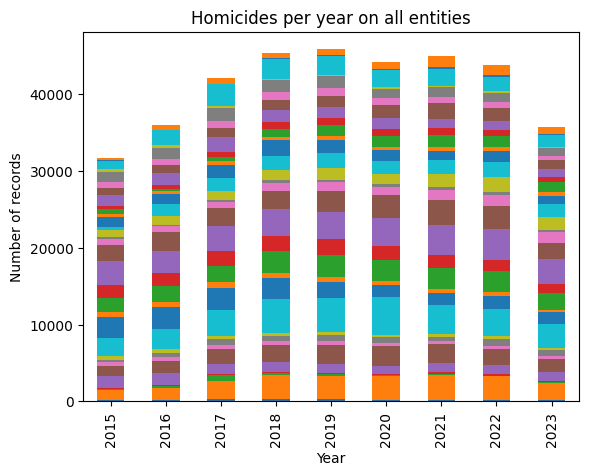

THEFT RISE PER YEAR


C:\Users\hughm\AppData\Local\Temp\ipykernel_22564\694008614.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mex_theft_df.drop('type_of_crime', axis=1, inplace=True)


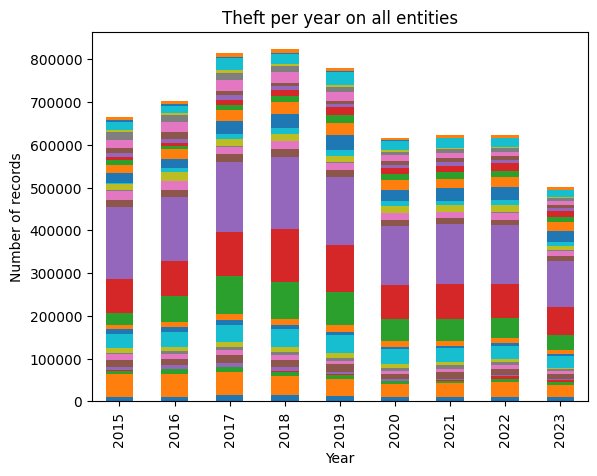

,entity,type_of_crime,count
0,Aguascalientes,Domestic violence,15585
1,Aguascalientes,Drug Trafficking,13229
2,Aguascalientes,Extortion,861
3,Aguascalientes,Homicide,2154
4,Aguascalientes,Human trafficking,27
...,...,...,...
315,Zacatecas,Injuries,19673
316,Zacatecas,Kidnapping,301
317,Zacatecas,Property damage,17718
318,Zacatecas,Sexual crime,4486


In [1366]:

# 9. Data Analysis

#  HOMICIDE RISE PER YEAR
print('HOMICIDE RISE PER YEAR')
mex_homicide_df = mexico_crime[mexico_crime['type_of_crime'] == 'Homicide']
mex_homicide_df.drop('type_of_crime', axis=1, inplace=True)
mex_homicide_df = mex_homicide_df.groupby(['year', 'entity'])['count'].sum().reset_index()
mex_homicide_df = mex_homicide_df.pivot(index='year', columns='entity', values='count')
fig, ax = plt.subplots()
mex_homicide_df.plot(kind='bar', ax=ax, stacked=True)
ax.legend_.remove()
ax.set_title('Homicides per year on all entities')
ax.set_xlabel('Year')
ax.set_ylabel('Number of records')
plt.show()

# ANALYSIS ON THEFT RISE PER YEAR
print('THEFT RISE PER YEAR')
mex_theft_df = mexico_crime[mexico_crime['type_of_crime'] == 'Theft']
mex_theft_df.drop('type_of_crime', axis=1, inplace=True)
mex_theft_df = mex_theft_df.groupby(['year', 'entity'])['count'].sum().reset_index()
mex_theft_df = mex_theft_df.pivot(index='year', columns='entity', values='count')
fig, ax = plt.subplots()
mex_theft_df.plot(kind='bar', ax=ax, stacked=True)
ax.legend_.remove()
ax.set_title('Theft per year on all entities')
ax.set_xlabel('Year')
ax.set_ylabel('Number of records')
plt.show()

# c) Group by entity, and type_of_crime (COUNTING CRIMES PER ENTITY)
mexico_crime = mexico_crime.groupby(['entity', 'type_of_crime'])['count'].sum().reset_index()

mexico_crime

In [1367]:
# 10. Pivoting the dataset for Machine Learning
states = mexico_crime['entity'].unique()
types_of_crime = mexico_crime['type_of_crime'].unique()
print(states, types_of_crime)
mexico_crime_df = mexico_crime.pivot(index='entity', columns='type_of_crime', values='count')
mexico_crime_df

['Aguascalientes' 'Baja California' 'Baja California Sur' 'Campeche'
 'Chiapas' 'Chihuahua' 'Coahuila' 'Colima' 'Durango' 'Guanajuato'
 'Guerrero' 'Hidalgo' 'Jalisco' 'Mexico City' 'Mexico State' 'Michoacan'
 'Morelos' 'Nayarit' 'Nuevo Leon' 'Oaxaca' 'Puebla' 'Queretaro'
 'Quintana Roo' 'San Luis Potosi' 'Sinaloa' 'Sonora' 'Tabasco'
 'Tamaulipas' 'Tlaxcala' 'Veracruz' 'Yucatan' 'Zacatecas'] ['Domestic violence' 'Drug Trafficking' 'Extortion' 'Homicide'
 'Human trafficking' 'Injuries' 'Kidnapping' 'Property damage'
 'Sexual crime' 'Theft']


type_of_crime,Domestic violence,Drug Trafficking,Extortion,Homicide,Human trafficking,Injuries,Kidnapping,Property damage,Sexual crime,Theft
entity,,,,,,,,,,
Aguascalientes,15585,13229,861,2154,27,38057,55,31752,3162,110573
Baja California,95117,61712,1501,23037,361,85146,118,74018,23459,369328
Baja California Sur,20662,4838,1260,2032,22,16860,23,14984,5160,72914
Campeche,4392,1198,335,1445,18,10283,36,7402,3167,19709
Chiapas,28959,8478,1026,11561,289,14819,170,11702,7598,53625
Chihuahua,108043,50221,123,18280,283,46692,170,66290,24866,139842
Coahuila,82915,61881,284,4053,73,45641,113,65982,10960,81697
Colima,25580,11363,671,6159,7,13192,74,19411,3553,62690
Durango,46031,6985,669,3515,8,33899,42,22528,6420,79533


In [1368]:
mexico_crime_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, Aguascalientes to Zacatecas
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Domestic violence  32 non-null     int64
 1   Drug Trafficking   32 non-null     int64
 2   Extortion          32 non-null     int64
 3   Homicide           32 non-null     int64
 4   Human trafficking  32 non-null     int64
 5   Injuries           32 non-null     int64
 6   Kidnapping         32 non-null     int64
 7   Property damage    32 non-null     int64
 8   Sexual crime       32 non-null     int64
 9   Theft              32 non-null     int64
dtypes: int64(10)
memory usage: 2.8+ KB


In [1369]:
# Get total Theft from Mexico State and Mexico City
mexico_crime_df['Theft']

entity
Aguascalientes          110573
Baja California         369328
Baja California Sur      72914
Campeche                 19709
Chiapas                  53625
Chihuahua               139842
Coahuila                 81697
Colima                   62690
Durango                  79533
Guanajuato              317540
Guerrero                 74885
Hidalgo                 113240
Jalisco                 526398
Mexico City             799595
Mexico State           1338690
Michoacan               136658
Morelos                 152742
Nayarit                   9425
Nuevo Leon              140244
Oaxaca                   91240
Puebla                  256385
Queretaro               210653
Quintana Roo            125789
San Luis Potosi         116037
Sinaloa                  74969
Sonora                   86786
Tabasco                 159182
Tamaulipas              114278
Tlaxcala                 33457
Veracruz                201561
Yucatan                  19552
Zacatecas                61824
N

In [1370]:
print('TOTALS')
print('Domestic violence', mexico_crime_df['Domestic violence'].sum())
print('Drug Trafficking', mexico_crime_df['Drug Trafficking'].sum())
print('Extortion', mexico_crime_df['Extortion'].sum())
print('Homicide', mexico_crime_df['Homicide'].sum())
print('Human trafficking', mexico_crime_df['Human trafficking'].sum())
print('Injuries', mexico_crime_df['Injuries'].sum())
print('Kidnapping', mexico_crime_df['Kidnapping'].sum())
print('Property damage', mexico_crime_df['Property damage'].sum())
print('Sexual crime', mexico_crime_df['Sexual crime'].sum())
print('Theft', mexico_crime_df['Theft'].sum())

mexico_crime_df.describe()



TOTALS
Domestic violence 1830348
Drug Trafficking 557828
Extortion 69285
Homicide 369795
Human trafficking 5300
Injuries 1808209
Kidnapping 9719
Property damage 1171376
Sexual crime 415228
Theft 6151041


type_of_crime,Domestic violence,Drug Trafficking,Extortion,Homicide,Human trafficking,Injuries,Kidnapping,Property damage,Sexual crime,Theft
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.00000,3.200000e+01
mean,57198.375000,17432.125000,2165.156250,11556.093750,165.625000,56506.531250,303.718750,36605.500000,12975.87500,1.922200e+05
std,49941.689284,23583.136365,4020.354832,8513.597478,221.952443,88010.982054,358.948845,28990.975877,13061.38641,2.631158e+05
min,584.000000,548.000000,34.000000,1284.000000,7.000000,3235.000000,2.000000,1561.000000,689.00000,9.425000e+03
25%,24528.750000,3297.500000,578.250000,4263.000000,53.000000,21215.750000,73.500000,17663.500000,5754.75000,7.439225e+04
50%,44649.000000,8745.500000,1143.000000,10753.500000,79.500000,37877.500000,168.000000,24683.500000,9622.00000,1.137590e+05
75%,77269.000000,18089.750000,1547.250000,16124.500000,228.250000,53005.500000,320.750000,53718.000000,12611.00000,1.697768e+05
max,230668.000000,109188.000000,22414.000000,32496.000000,938.000000,514575.000000,1403.000000,115817.000000,60465.00000,1.338690e+06


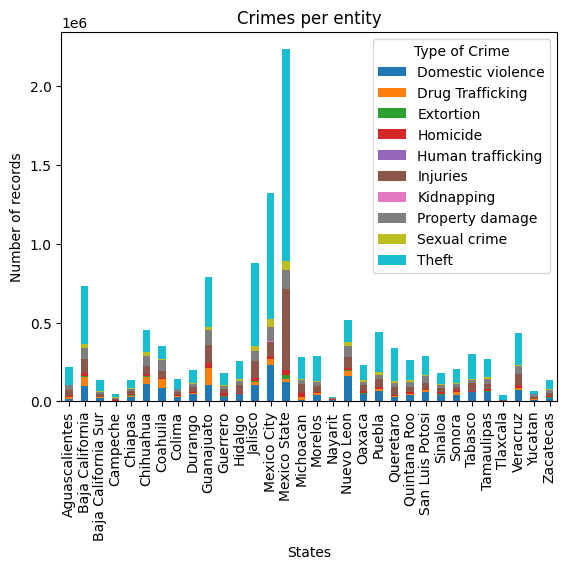

In [1371]:
# 11. Visualizing the main types of crime in the dataset
fig, ax = plt.subplots()

mexico_crime_df.plot(kind='bar', ax=ax, stacked=True)

ax.set_xlabel('States')
ax.set_ylabel('Number of records')
ax.set_title('Crimes per entity')
ax.legend(title='Type of Crime')

ax.set_xticks(range(len(states)))
ax.set_xticklabels(states)

plt.show()

<Axes: title={'center': 'Homicides per entity'}, xlabel='Entity'>

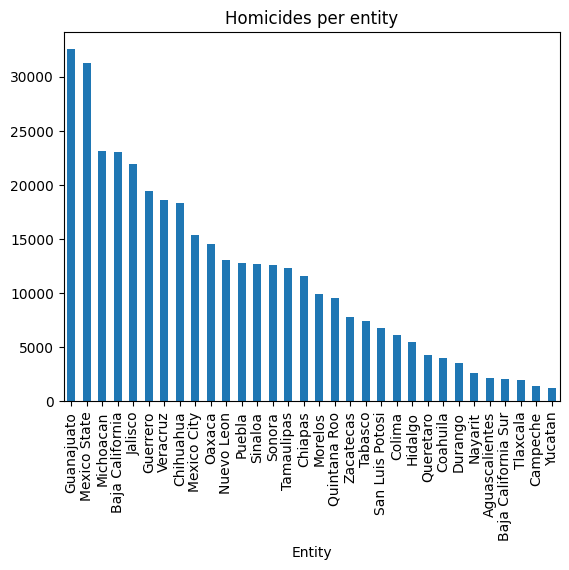

In [1372]:
# Focus on Homicides per entity (the most alarming crime incident)
homicides_per_state = mexico_crime_df.groupby('entity')['Homicide'].sum()
homicides_per_state = homicides_per_state.sort_values(ascending=False)
homicides_per_state.plot(kind='bar', title='Homicides per entity', xlabel='Entity')

<Axes: title={'center': 'Drug Trafficking per entity'}, xlabel='Entity'>

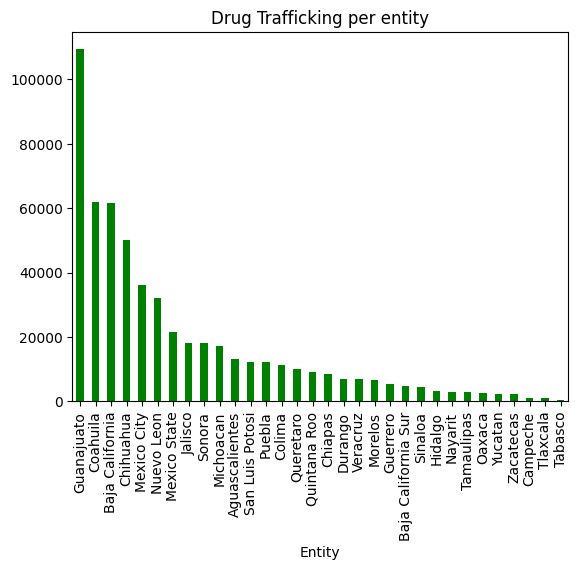

In [1373]:
# Focus on Drug Trafficking per entity
drug_per_state = mexico_crime_df.groupby('entity')['Drug Trafficking'].sum()
drug_per_state = drug_per_state.sort_values(ascending=False)
drug_per_state.plot(kind='bar', title='Drug Trafficking per entity', xlabel='Entity', color='green')

In [1374]:
#pip install folium

In [1375]:
# Mapping theft locations
import folium
import numpy as np
from folium import plugins

entities_coordinates = {
    'Aguascalientes': [21.8859, -102.2895],
    'Baja California': [30.75, -115.6667],
    'Baja California Sur': [27.9458, -114.9214],
    'Campeche': [19.8333, -90.5],
    'Chiapas': [16.75, -93.5],
    'Chihuahua': [28.6333, -106.0333],
    'Coahuila': [27.5667, -101.1833],
    'Colima': [19.2333, -103.7333],
    'Durango': [24.0333, -104.6667],
    'Guanajuato': [21.6167, -101.5],
    'Guerrero': [17.6667, -101.5],
    'Hidalgo': [20.0833, -98.7667],
    'Jalisco': [20.6667, -103.3333],
    'Morelos': [18.9167, -99.25],
    'Mexico City': [19.4326, -99.1332],
    'Mexico State': [19.5, -99.5],
    'Michoacan': [19.5667, -101.7],
    'Nayarit': [21.6667, -104.5],
    'Nuevo Leon': [25.6667, -100.3333], 
    'Oaxaca': [17.0667, -96.6667],
    'Puebla': [19.5, -98.5],
    'Queretaro': [20.6667, -100.5],
    'Quintana Roo': [20.3333, -86.6667],
    'San Luis Potosi': [22.1569, -100.9869],
    'Sinaloa': [25.6667, -107.5],
    'Sonora': [29.6667, -111.5],
    'Tabasco': [17.8333, -93.5],
    'Tamaulipas': [23.7417, -99.1460],
    'Tlaxcala': [19.5, -98.5],
    'Veracruz': [19.5, -96.8333],
    'Yucatan': [20.6667, -88.5],
    'Zacatecas': [22.75, -102.5]
}


print('Homicides per state')
coord = []

for state, homicides in homicides_per_state.items():
    coord.append([entities_coordinates[state][0], entities_coordinates[state][1], homicides])

map = folium.Map(
    location=[23.75, -102.4],
    tiles='openstreetmap',
    zoom_start=5,
    width='100%',
    height='100%',
    control_scale=True)
map.add_child(plugins.HeatMap(coord))
map

Homicides per state


In [1376]:

theft_per_state = mexico_crime_df.groupby('entity')['Theft'].sum()
theft_per_state = theft_per_state.sort_values(ascending=False)


print('Theft per state')
coord = []

for state, cases in theft_per_state.items():
    coord.append([entities_coordinates[state][0], entities_coordinates[state][1], cases])

map = folium.Map(
    location=[23.75, -102.4],
    tiles='openstreetmap',
    zoom_start=5,
    width='100%',
    height='100%',
    control_scale=True)
map.add_child(plugins.HeatMap(coord))
map

Theft per state


In [1377]:
''' METHODS '''
# 12. Data Preprocessing - Normalization

from sklearn import preprocessing
df_preprocessed = preprocessing.scale(mexico_crime_df)
print(df_preprocessed)
df_preprocessed = pd.DataFrame(df_preprocessed)

[[-8.46571910e-01 -1.81077665e-01 -3.29578888e-01 -1.12203294e+00
  -6.34564498e-01 -2.12981858e-01 -7.03995866e-01 -1.70092961e-01
  -7.63388101e-01 -3.15273632e-01]
 [ 7.71406856e-01  1.90765118e+00 -1.67841758e-01  1.37011556e+00
   8.94341128e-01  3.30614756e-01 -5.25675013e-01  1.31113689e+00
   8.15446792e-01  6.83888583e-01]
 [-7.43286714e-01 -5.42576000e-01 -2.28745896e-01 -1.13659225e+00
  -6.57452307e-01 -4.57680565e-01 -7.94571537e-01 -7.57734616e-01
  -6.07970448e-01 -4.60690918e-01]
 [-1.07427945e+00 -6.99393297e-01 -4.62506591e-01 -1.20664402e+00
  -6.75762554e-01 -5.33605621e-01 -7.57775170e-01 -1.02344901e+00
  -7.62999168e-01 -6.66137868e-01]
 [-5.74494658e-01 -3.85758703e-01 -2.87881034e-01  5.85505128e-04
   5.64756682e-01 -4.81241921e-01 -3.78489548e-01 -8.72753694e-01
  -4.18326684e-01 -5.35173884e-01]
 [ 1.03437011e+00  1.41259966e+00 -5.16082016e-01  8.02421726e-01
   5.37291311e-01 -1.13299198e-01 -3.78489548e-01  1.04030586e+00
   9.24892557e-01 -2.02253675e-01

[320.0, 173.30727063027865, 100.18510209282853, 74.83052981009442, 58.0728979285789, 44.607528393297194, 34.89525494530616, 28.609699905473306, 23.99463542838606, 19.70910527850054]


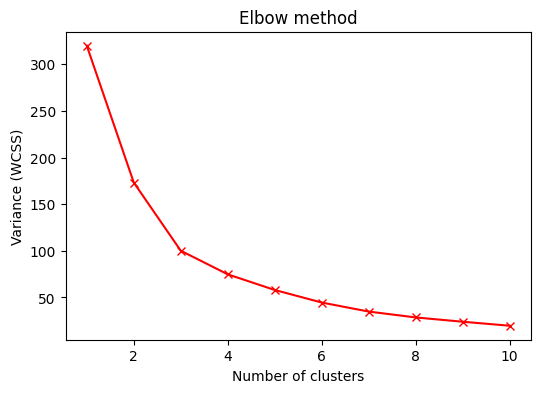

In [1378]:
# 13. K means - Finding number of clusters (Elbow Method)
plt.figure(figsize=(6, 4))
wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_preprocessed)
    wcss.append(kmeans.inertia_)

print(wcss)

plt.plot(range(1, 11), wcss, 'rx-')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Variance (WCSS)')
plt.show()

[np.float64(0.669613755966282), np.float64(0.5194290847347391), np.float64(0.48998274327899527), np.float64(0.4755617799479639), np.float64(0.26857239642643294), np.float64(0.2690943627132235), np.float64(0.266699482678631), np.float64(0.25792923937638185), np.float64(0.2567430719959563)]


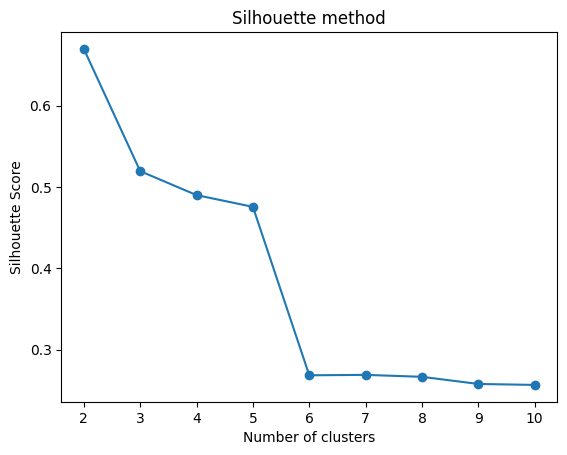

In [1379]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_preprocessed)
    score = silhouette_score(df_preprocessed, kmeans.labels_)
    silhouette_scores.append(score)

print(silhouette_scores)

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette method')
plt.show()

In [1380]:
# 11. K means - Clustering
NUMBER_OF_CLUSTERS = 4

kmeans = KMeans(n_clusters=NUMBER_OF_CLUSTERS, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(df_preprocessed)
y_kmeans

array([0, 3, 0, 0, 0, 3, 3, 0, 0, 3, 0, 0, 3, 2, 1, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [1381]:
# 15. Assigning cluster labels to the dataset
y_kmeans1 = y_kmeans + 1
print(y_kmeans1)
cluster = list(y_kmeans1)
mexico_crime_df['Cluster'] = cluster
mexico_crime_df

[1 4 1 1 1 4 4 1 1 4 1 1 4 3 2 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1]


type_of_crime,Domestic violence,Drug Trafficking,Extortion,Homicide,Human trafficking,Injuries,Kidnapping,Property damage,Sexual crime,Theft,Cluster
entity,,,,,,,,,,,
Aguascalientes,15585,13229,861,2154,27,38057,55,31752,3162,110573,1
Baja California,95117,61712,1501,23037,361,85146,118,74018,23459,369328,4
Baja California Sur,20662,4838,1260,2032,22,16860,23,14984,5160,72914,1
Campeche,4392,1198,335,1445,18,10283,36,7402,3167,19709,1
Chiapas,28959,8478,1026,11561,289,14819,170,11702,7598,53625,1
Chihuahua,108043,50221,123,18280,283,46692,170,66290,24866,139842,4
Coahuila,82915,61881,284,4053,73,45641,113,65982,10960,81697,4
Colima,25580,11363,671,6159,7,13192,74,19411,3553,62690,1
Durango,46031,6985,669,3515,8,33899,42,22528,6420,79533,1


In [1382]:
# 16. Results
print('CLUSTER 1:', mexico_crime_df[mexico_crime_df['Cluster'] == 1].index)
print('CLUSTER 2:', mexico_crime_df[mexico_crime_df['Cluster'] == 2].index)
print('CLUSTER 3:', mexico_crime_df[mexico_crime_df['Cluster'] == 3].index)
print('CLUSTER 4:', mexico_crime_df[mexico_crime_df['Cluster'] == 4].index)

mexico_crime_df[['Cluster']]

CLUSTER 1: Index(['Aguascalientes', 'Baja California Sur', 'Campeche', 'Chiapas',
       'Colima', 'Durango', 'Guerrero', 'Hidalgo', 'Michoacan', 'Morelos',
       'Nayarit', 'Oaxaca', 'Puebla', 'Queretaro', 'Quintana Roo',
       'San Luis Potosi', 'Sinaloa', 'Sonora', 'Tabasco', 'Tamaulipas',
       'Tlaxcala', 'Veracruz', 'Yucatan', 'Zacatecas'],
      dtype='object', name='entity')
CLUSTER 2: Index(['Mexico State'], dtype='object', name='entity')
CLUSTER 3: Index(['Mexico City', 'Nuevo Leon'], dtype='object', name='entity')
CLUSTER 4: Index(['Baja California', 'Chihuahua', 'Coahuila', 'Guanajuato', 'Jalisco'], dtype='object', name='entity')


type_of_crime,Cluster
entity,
Aguascalientes,1
Baja California,4
Baja California Sur,1
Campeche,1
Chiapas,1
Chihuahua,4
Coahuila,4
Colima,1
Durango,1


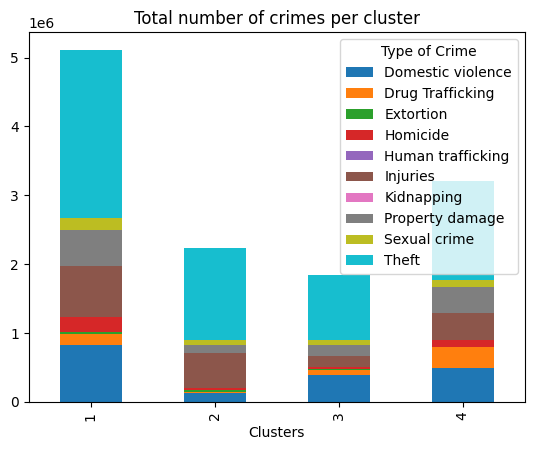

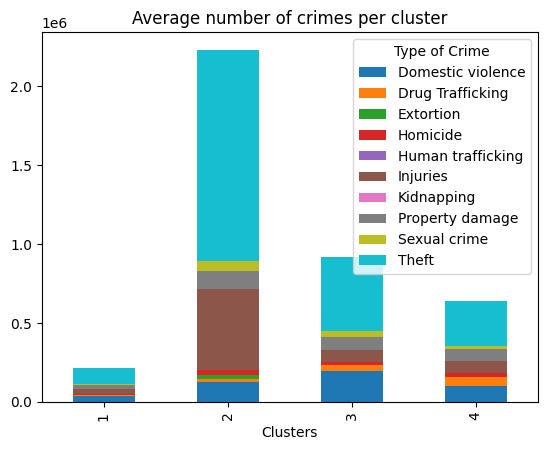

type_of_crime,Domestic violence,Drug Trafficking,Extortion,Homicide,Human trafficking,Injuries,Kidnapping,Property damage,Sexual crime,Theft
Cluster,,,,,,,,,,
1,821411,166667,27317,210277,2301,743235,5693,524565,173695,2437707
2,123688,21660,22414,31242,938,514575,1403,115817,60465,1338690
3,394513,68245,10056,28464,1187,156634,2001,162472,73155,939839
4,490736,301256,9498,99812,874,393765,622,368522,107913,1434805


In [1383]:
# 17. Visualizing the clusters

kmeans_cluster_df = mexico_crime_df.groupby('Cluster').sum()

kmeans_cluster_df.plot(kind='bar', stacked=True)
plt.title('Total number of crimes per cluster')
plt.xlabel('Clusters')
plt.legend(title='Type of Crime')
plt.show()


kmeans_cluster_mean_df = pd.DataFrame(round(mexico_crime_df.groupby('Cluster').mean(), 2))
kmeans_cluster_mean_df.plot(kind='bar', stacked=True)
plt.title('Average number of crimes per cluster')
plt.xlabel('Clusters')
plt.legend(title='Type of Crime')
plt.show()

kmeans_cluster_df

CLUSTER 2
entity
Mexico State    1338690
Name: Theft, dtype: int64


<Axes: title={'center': 'Theft per entity'}, xlabel='Entity'>

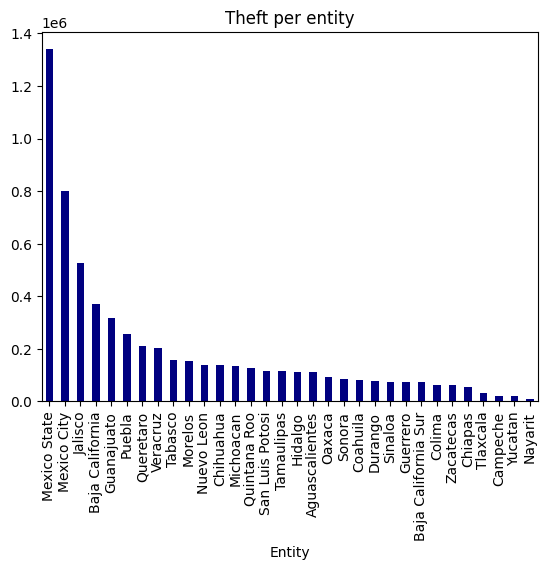

In [1384]:
# CLUSTER 2: Theft
print('CLUSTER 2')
cluster_1 = mexico_crime_df[mexico_crime_df['Cluster'] == 2]['Theft']
print(cluster_1)
theft_per_state = mexico_crime_df.groupby('entity')['Theft'].sum()
theft_per_state = theft_per_state.sort_values(ascending=False)
theft_per_state.plot(kind='bar', title='Theft per entity', cmap='jet', xlabel='Entity')

CLUSTER 2
entity
Mexico State    514575
Name: Injuries, dtype: int64


<Axes: title={'center': 'Injuries per entity'}, xlabel='Entity'>

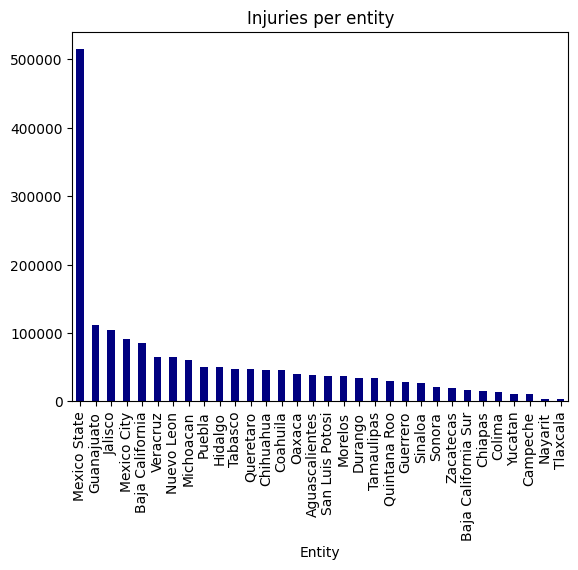

In [1385]:
# CLUSTER 2: Injuries
print('CLUSTER 2')
cluster_2 = mexico_crime_df[mexico_crime_df['Cluster'] == 2]['Injuries']
print(cluster_2)
injuries_per_state = mexico_crime_df.groupby('entity')['Injuries'].sum()
injuries_per_state = injuries_per_state.sort_values(ascending=False)
injuries_per_state.plot(kind='bar', title='Injuries per entity', cmap='jet', xlabel='Entity')

In [1386]:
og_mexico_crime[og_mexico_crime['type_of_crime'] == 'Injuries']['modality'].unique()

array(['With firearm', 'With sharp weapon', 'With another element',
       'Not specified', 'In traffic accident'], dtype=object)

CLUSTER 3
entity
Mexico City    230668
Nuevo Leon     163845
Name: Domestic violence, dtype: int64


<Axes: title={'center': 'Domestic violence in Cluster #3'}, xlabel='Entity'>

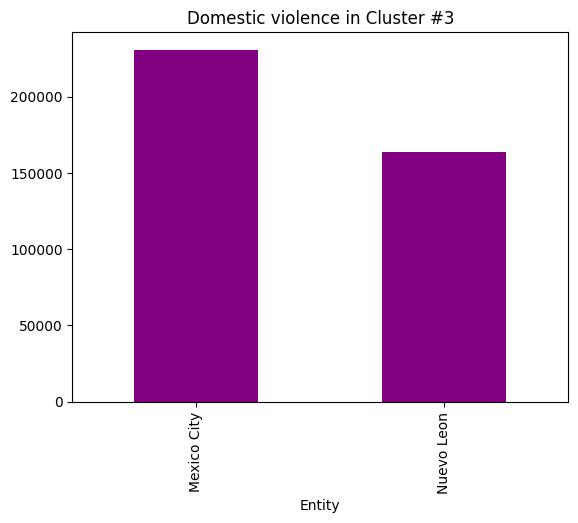

In [1387]:

# CLUSTER 3: Domestic violence
print('CLUSTER 3')
cluster_3 = mexico_crime_df[mexico_crime_df['Cluster'] == 3]['Domestic violence']
print(cluster_3)
cluster_3.plot(kind='bar', title='Domestic violence in Cluster #3', xlabel='Entity', color='purple')

<Axes: title={'center': 'Domestic violence per entity'}, xlabel='Entity'>

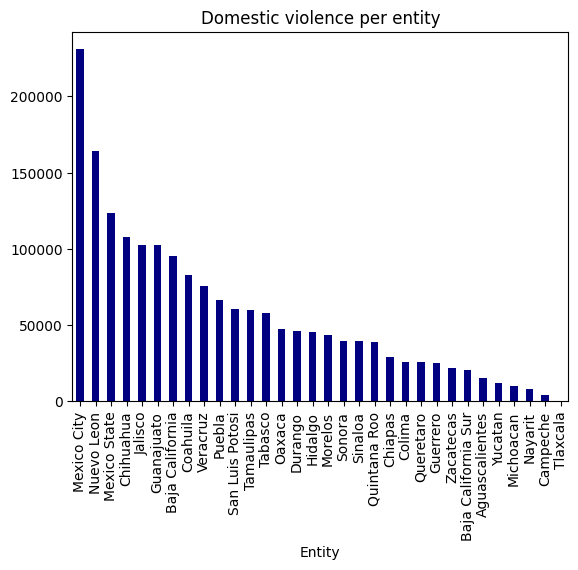

In [1388]:
domestic_per_state = mexico_crime_df.groupby('entity')['Domestic violence'].sum()
domestic_per_state = domestic_per_state.sort_values(ascending=False)
domestic_per_state.plot(kind='bar', title='Domestic violence per entity', cmap='jet', xlabel='Entity')

CLUSTER 4


<Axes: title={'center': 'Drug Trafficking reports in Cluster #4'}, xlabel='Entity'>

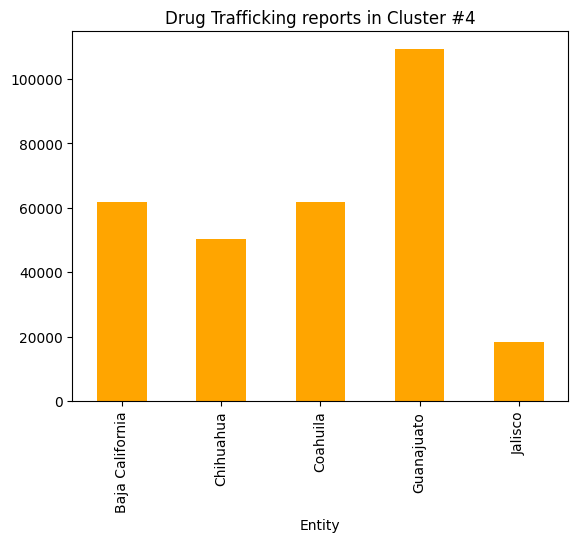

In [1389]:
# CLUSTER 4: Drug Trafficking
print('CLUSTER 4')
cluster_4 = mexico_crime_df[mexico_crime_df['Cluster'] == 4]['Drug Trafficking']
cluster_4.plot(kind='bar', title='Drug Trafficking reports in Cluster #4', xlabel='Entity', color='orange')

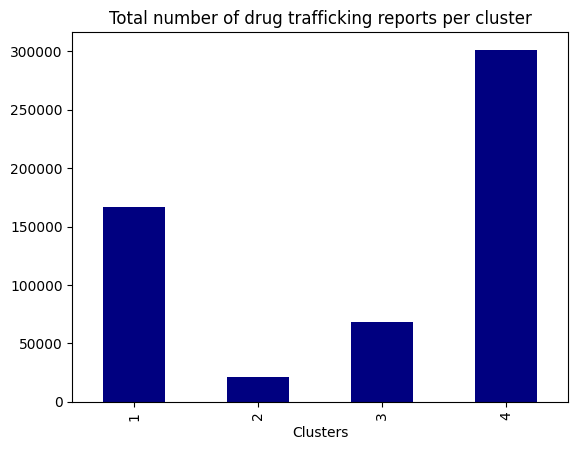

In [1390]:

kmeans_cluster_drugs_df = mexico_crime_df.groupby('Cluster')['Drug Trafficking'].sum()

kmeans_cluster_drugs_df.plot(kind='bar', stacked=True, cmap='jet')
plt.title('Total number of drug trafficking reports per cluster')
plt.xlabel('Clusters')
plt.legend().set_visible(False)
plt.show()

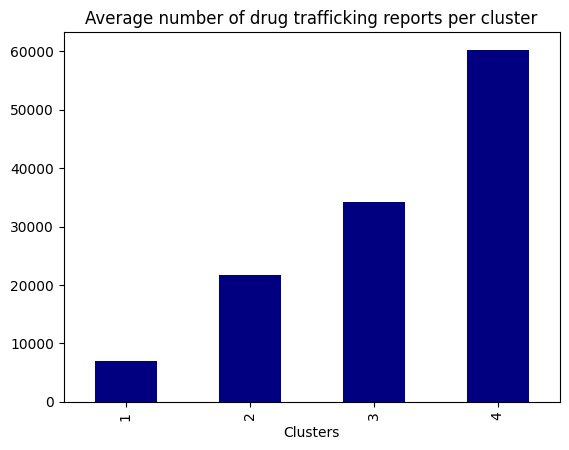

In [1391]:
# Mean number of drug trafficking reports per cluster
kmeans_cluster_drugs_mean_df = pd.DataFrame(round(mexico_crime_df.groupby('Cluster')['Drug Trafficking'].mean(), 2))
kmeans_cluster_drugs_mean_df.plot(kind='bar', stacked=True, cmap='jet')
plt.title('Average number of drug trafficking reports per cluster')
plt.xlabel('Clusters')
plt.legend().set_visible(False)
plt.show()